In [0]:
#%pip install textblob
#%pip install langdetect

In [0]:
import pandas as pd
from pyspark.sql import Row, Column
from pyspark.sql.functions import *
from pyspark.sql.types import *
from textblob import TextBlob
from langdetect import detect
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation


file_location = "dbfs:/FileStore/tables/wiki2.csv"

schema_def = StructType(
    [
        StructField("$schema", StringType(), True),
        StructField("type", StringType(), True),
        StructField("title", StringType(), True),
        StructField("comment", StringType(), True),
        StructField("timestamp", LongType(), True),
        StructField("user", StringType(), True),
        StructField("bot", BooleanType(), True),
        StructField("minor", BooleanType(), True),
        StructField("patrolled", BooleanType(), True),
        StructField("length_old", IntegerType(), True),
        StructField("length_new", IntegerType(), True),
        StructField("revision_old", LongType(), True),
        StructField("revision_new", LongType(), True),
        StructField("server_url", StringType(), True),
        StructField("server_name", StringType(), True),
        StructField("wiki", StringType(), True),
    ]
)

df = spark.read.csv(file_location, encoding="UTF-8", header=True, schema=schema_def)
display(df)

$schema type title comment timestamp user bot minor patrolled length_old length_new revision_old revision_new server_url server_name wiki /mediawiki/recentchange/1.0.0 new Q124176608 /* wbeditentity-create-item:0| */ Bot: New item with sitelink from Şablon:Taksonomi/Glanitaenia 1704668772 Dcirovicbot true false true 0 360 0 2048244100 https://www.wikidata.org www.wikidata.org wikidatawiki /mediawiki/recentchange/1.0.0 edit File:Burma independence day of 1cent stamp in 1943.JPG /* wbeditentity-update:0| */ automatically adding [[Commons:Structured data|structured data]] based on file information 1704668772 SchlurcherBot true false true 1047 3062 771794944 839365841 https://commons.wikimedia.org commons.wikimedia.org commonswiki /mediawiki/recentchange/1.0.0 edit File:Metzingen Am Klosterhof 13 null added [[Category:Buildings in Metzingen]] null null false null null 7675 7711 710516022 839365839 https://commons.wikimedia.org /mediawiki/recentchange/1.0.0 edit Q6145891 /* wbeditentity-update-languages-short:0||ru */ removing redundant [[Special:MyLanguage/Help:Aliases|aliases]] 1704668772 Bitbotje true false true 10655 10574 2046387488 2048244102 https://www.wikidata.org www.wikidata.org wikidatawiki /mediawiki/recentchange/1.0.0 edit Węglino [[WP:SK]]+[[WP:SK/mSK|mSK]]+[[WP:SK/mSI|mSI.v2]] 1704668772 Malarz pl false true false 1353 1456 65601070 72433431 https://pl.wikipedia.org pl.wikipedia.org plwiki /mediawiki/recentchange/1.0.0 edit Q3674566 /* wbeditentity-update:0| */ fix ISNI format ([[:toollabs:editgroups/b/wikibase-cli/1d9061a46973c/|details]]) 1704668772 VojtěchDostálBot true false true 16339 16336 1845968265 2048244103 https://www.wikidata.org www.wikidata.org wikidatawiki /mediawiki/recentchange/1.0.0 edit Q5288604 /* wbsetaliases-add:1|ja */ JD09 1704668772 ギャラクシーライナー false false true 19162 19234 2048244097 2048244101 https://www.wikidata.org www.wikidata.org wikidatawiki /mediawiki/recentchange/1.0.0 edit File:Bundesarchiv N 1572 Bild-1925-071 Polarfahrt Dampfer "München" null null null null false null null 4602 4620 838457284 839365842 https://commons.wikimedia.org /mediawiki/recentchange/1.0.0 edit Q116316700 /* wbeditentity-update-languages-short:0||hi */ . 1704668772 Dcirovicbot true false true 8120 8225 2048244096 2048244105 https://www.wikidata.org www.wikidata.org wikidatawiki /mediawiki/recentchange/1.0.0 edit Q33191297 /* wbeditentity-update-languages-short:0||sl null id null null null null null null null 20542 20857 1958959669 /mediawiki/recentchange/1.0.0 new 페이지:민태원 무쇠탈 1923.pdf/90 /* 교정 안 됨 */ 새 문서: {{옛한글쪽 시작}} 니 누어 죽기라도 하리라고 말등에 ᄎᆡᆨ즉을 퍼부엇스나 그는 일전에 새로 산 시골말이라 총소리에 놀나서 ᄭᅩᆷ작달삭을 아니한다 갑갑하기 ᄶᅡᆨ이 업스매 다만 『이를 엇지하랴』고 안장 우에서 조비빔을 하는 동안에 날너오는 탄환은 그의 말을 마추어 인마가 한가지로 강물어 굴너 ᄯᅥ러젓다 월희도 여간 허염치는 법을 몰으는 터가... 1704668772 ZornsLemon false false false 0 2106 0 312934 https://ko.wikisource.org ko.wikisource.org kowikisource /mediawiki/recentchange/1.0.0 edit File:Sanborn Fire Insurance Map from Burlington Chittenden County null 1919 null null null null null null null 2033 1870 839365823 /mediawiki/recentchange/1.0.0 edit File:Sanborn Fire Insurance Map from Burlington Chittenden County null 1919 null null null null null null null 2040 1877 839365815 /mediawiki/recentchange/1.0.0 edit Q3674593 /* wbeditentity-update:0| */ fix ISNI format ([[:toollabs:editgroups/b/wikibase-cli/1d9061a46973c/|details]]) 1704668773 VojtěchDostálBot true false true 23685 23682 2036578127 2048244107 https://www.wikidata.org www.wikidata.org wikidatawiki /mediawiki/recentchange/1.0.0 edit Q33191297 /* wbsetlabel-set:1|en */ RECORDING OF MEDICAL DATA IN HOSPITALS null Europe PMC and CrossRef null null true null null 20857 20856 2048244104 2048244106 https://www.wikidata.org /mediawiki/recentchange/1.0.0 edit Gianni Schicchi /* Dipnotlar */Kaynakça etiketi düzenleniyor. null 1704668772 null true true null 13900 13905 30763735 31088571 https://tr.wikipedia.org tr.wikipedia.org /mediawiki/recentchange/1.0.0 edit File:Burma indo china 1886.jpg /* wbedi

In [0]:
df_without_nulls = df.dropna(subset=['title', 'bot', 'type', 'timestamp'])
# display(df_without_nulls)

In [0]:
display(df_without_nulls.select("*").groupBy("bot").agg(count("title")))

bot count(title) true 2292 false 2062

In [0]:
def analyze_sentiment(title):
    try:
        return detect(title)
    except:
        return 'unknown'

# Register the UDF
sentiment_udf = udf(analyze_sentiment, StringType())

# Apply the UDF on the 'title' column to calculate sentiment polarity
df_with_sentiment = df_without_nulls.withColumn('sentiment', sentiment_udf(df_without_nulls['title']))

# Show the DataFrame with sentiment analysis results
#display(df_with_sentiment)
df_filtered_sentiment = df_with_sentiment.dropna(subset=['sentiment'])
language_sentiment_stats = df_filtered_sentiment.groupBy('sentiment').agg(count('sentiment').alias('cnt_sentiment')).orderBy('cnt_sentiment', ascending=False)
display(language_sentiment_stats)

sentiment cnt_sentiment vi 1836 en 667 de 187 fr 186 ro 118 id 107 it 101 pl 84 tr 84 no 81 es 68 pt 66 ar 59 ru 47 tl 45 nl 42 da 42 et 39 ca 38 he 38 fi 35 ko 33 af 31 hu 29 uk 28 sv 27 sw 23 so 22 ja 22 sl 19 lt 17 cy 17 fa 14 hr 13 ur 12 zh-cn 12 zh-tw 9 bg 9 sk 8 lv 7 cs 7 sq 7 el 6 th 3 mk 3 bn 2 ml 2 unknown 1 mr 1

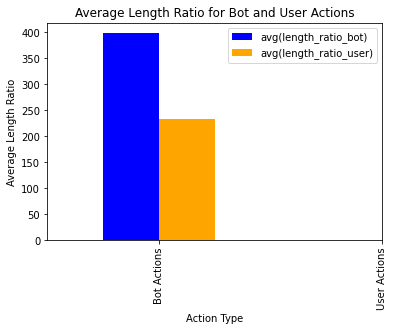

type bot_action_count user_action_count edit 2183 1943 new 109 119

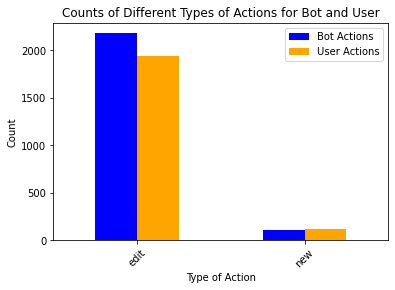

timestamp bot count 1975-05-27T23:54:36.600+0000 false 1 1975-05-27T23:54:37.000+0000 true 1 1975-05-27T23:54:37.100+0000 true 1 1975-05-27T23:54:37.100+0000 false 1 1975-05-27T23:54:37.200+0000 false 3 1975-05-27T23:54:37.200+0000 true 5 1975-05-27T23:54:37.300+0000 false 3 1975-05-27T23:54:37.300+0000 true 7 1975-05-27T23:54:37.400+0000 true 5 1975-05-27T23:54:37.400+0000 false 4 1975-05-27T23:54:37.500+0000 true 6 1975-05-27T23:54:37.500+0000 false 8 1975-05-27T23:54:37.600+0000 true 7 1975-05-27T23:54:37.600+0000 false 6 1975-05-27T23:54:37.700+0000 true 7 1975-05-27T23:54:37.700+0000 false 8 1975-05-27T23:54:37.800+0000 false 4 1975-05-27T23:54:37.800+0000 true 5 1975-05-27T23:54:37.900+0000 true 7 1975-05-27T23:54:37.900+0000 false 3 1975-05-27T23:54:38.000+0000 true 9 1975-05-27T23:54:38.000+0000 false 6 1975-05-27T23:54:38.100+0000 false 4 1975-05-27T23:54:38.100+0000 true 6 1975-05-27T23:54:38.200+0000 false 4 1975-05-27T23:54:38.200+0000 true 7 1975-05-27T23:54:38.300+0000 true 6 1975-05-27T23:54:38.300+0000 false 6 1975-05-27T23:54:38.400+0000 false 5 1975-05-27T23:54:38.400+0000 true 5 1975-05-27T23:54:38.500+0000 true 5 1975-05-27T23:54:38.500+0000 false 4 1975-05-27T23:54:38.600+0000 true 7 1975-05-27T23:54:38.600+0000 false 8 1975-05-27T23:54:38.700+0000 true 6 1975-05-27T23:54:38.700+0000 false 7 1975-05-27T23:54:38.800+0000 false 7 1975-05-27T23:54:38.800+0000 true 8 1975-05-27T23:54:38.900+0000 false 4 1975-05-27T23:54:38.900+0000 true 8 1975-05-27T23:54:39.000+0000 true 9 1975-05-27T23:54:39.000+0000 false 6 1975-05-27T23:54:39.100+0000 false 8 1975-05-27T23:54:39.100+0000 true 5 1975-05-27T23:54:39.200+0000 true 8 1975-05-27T23:54:39.200+0000 false 6 1975-05-27T23:54:39.300+0000 false 4 1975-05-27T23:54:39.300+0000 true 5 1975-05-27T23:54:39.400+0000 false 9 1975-05-27T23:54:39.400+0000 true 8 1975-05-27T23:54:39.500+0000 true 7 1975-05-27T23:54:39.500+0000 false 4 1975-05-27T23:54:39.600+0000 true 9 1975-05-27T23:54:39.600+0000 false 4 1975-05-27T23:54:39.700+0000 false 4 1975-05-27T23:54:39.700+0000 true 7 1975-05-27T23:54:39.800+0000 true 7 1975-05-27T23:54:39.800+0000 false 8 1975-05-27T23:54:39.900+0000 false 3 1975-05-27T23:54:39.900+0000 true 6 1975-05-27T23:54:40.000+0000 false 6 1975-05-27T23:54:40.000+0000 true 7 1975-05-27T23:54:40.100+0000 false 2 1975-05-27T23:54:40.100+0000 true 4 1975-05-27T23:54:40.200+0000 false 4 1975-05-27T23:54:40.200+0000 true 9 1975-05-27T23:54:40.300+0000 true 5 1975-05-27T23:54:40.300+0000 false 7 1975-05-27T23:54:40.400+0000 false 1 1975-05-27T23:54:40.400+0000 true 6 1975-05-27T23:54:40.500+0000 true 5 1975-05-27T23:54:40.500+0000 false 9 1975-05-27T23:54:40.600+0000 true 7 1975-05-27T23:54:40.600+0000 false 4 1975-05-27T23:54:40.700+0000 true 6 1975-05-27T23:54:40.700+0000 false 5 1975-05-27T23:54:40.800+0000 true 8 1975-05-27T23:54:40.800+0000 false 6 1975-05-27T23:54:40.900+0000 true 7 1975-05-27T23:54:40.900+0000 false 3 1975-05-27T23:54:41.000+0000 false 9 1975-05-27T23:54:41.000+0000 true 7 1975-05-27T23:54:41.100+0000 false 3 1975-05-27T23:54:41.100+0000 true 4 1975-05-27T23:54:41.200+0000 false 5 1975-05-27T23:54:41.200+0000 true 6 1975-05-27T23:54:41.300+0000 true 8 1975-05-27T23:54:41.300+0000 false 3 1975-05-27T23:54:41.400+0000 false 3 1975-05-27T23:54:41.400+0000 true 4 1975-05-27T23:54:41.500+0000 true 5 1975-05-27T23:54:41.500+0000 false 7 1975-05-27T23:54:41.600+0000 true 8 1975-05-27T23:54:41.600+0000 false 6 1975-05-27T23:54:41.700+0000 false 8 1975-05-27T23:54:41.700+0000 true 6 1975-05-27T23:54:41.800+0000 true 6 1975-05-27T23:54:41.800+0000 false 7 1975-05-27T23:54:41.900+0000 true 9 1975-05-27T23:54:41.900+0000 false 12 1975-05-27T23:54:42.000+0000 false 5 1975-05-27T23:54:42.000+0000 true 7 1975-05-27T23:54:42.100+0000 true 8 1975-05-27T23:54:42.100+0000 false 4 1975-05-27T23:54:42.200+0000 false 3 1975-05-27T23:54:42.200+0000 true 5 1975-05-27T23:54:42.300+0000 true 4 1975-05-27T23:54:42.300+0000 false 6 1975-05-27T23:54:42.400+0000 true 5 1

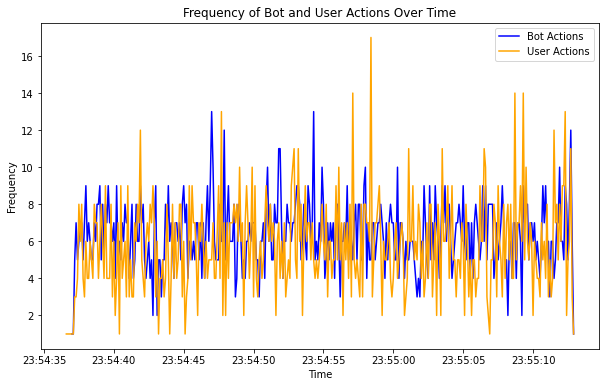

In [0]:
bot_actions = df_without_nulls.filter(col('bot') == True)
user_actions = df_without_nulls.filter(col('bot') == False)

# Prosecna promena duzine koju pravi user-bot
bot_actions_len = bot_actions.withColumn('length_ratio_bot', col('length_new') - col('length_old')).agg({'length_ratio_bot': 'avg'})
user_actions_len = user_actions.withColumn('length_ratio_user', col('length_new') - col('length_old')).agg({'length_ratio_user': 'avg'})

len_ratios = bot_actions_len.join(user_actions_len)

# Plot
len_ratios_pandas = len_ratios.toPandas()
len_ratios_pandas.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Action Type')
plt.ylabel('Average Length Ratio')
plt.title('Average Length Ratio for Bot and User Actions')
plt.xticks([0, 1], ['Bot Actions', 'User Actions'])
plt.show()


# Odnos tipa promene za usera i bota
type_counts_bot = bot_actions.groupBy('type').count()
type_counts_user = user_actions.groupBy('type').count()

type_ratios = type_counts_bot.withColumnRenamed('count', 'bot_action_count').join(type_counts_user.withColumnRenamed('count', 'user_action_count'), 'type', 'outer')

# display(type_ratios)
# display(type_counts_bot)
# display(type_counts_user)

# Plot
display(type_ratios)
type_ratios_pandas = type_ratios.toPandas()
type_ratios_pandas.plot(kind='bar', x='type', y=['bot_action_count', 'user_action_count'], color=['blue', 'orange'])
plt.xlabel('Type of Action')
plt.ylabel('Count')
plt.title('Counts of Different Types of Actions for Bot and User')
plt.legend(['Bot Actions', 'User Actions'])
plt.xticks(rotation=45)
plt.show()


# Frekvencija izmene bota i usera
df_times = df_without_nulls.withColumn('timestamp', (col('timestamp')).cast('timestamp'))

time_counts = df_times.groupBy('timestamp', 'bot').count().orderBy('timestamp')

bot_time_counts = time_counts.filter(col('bot') == True).select('timestamp', 'count')
user_time_counts = time_counts.filter(col('bot') == False).select('timestamp', 'count')
display(time_counts)
# Plot
bot_time_pd = bot_time_counts.toPandas()
user_time_pd = user_time_counts.toPandas()
plt.figure(figsize=(10, 6))
plt.plot(bot_time_pd['timestamp'], bot_time_pd['count'], label='Bot Actions', color='blue')
plt.plot(user_time_pd['timestamp'], user_time_pd['count'], label='User Actions', color='orange')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Frequency of Bot and User Actions Over Time')
plt.legend()
plt.show()

# Pearson's correlation test

The Product Moment Correlation Coefficiont (PMCC), or r, is a measure of how strongly related 2 variables are. <br>
Sample size 2,305, significant level 0.05 <br>
The hypothesis is one-tailed (right) since we are only testing for positive correlation. <br>
The corresponding critical correlation value r_c for a signifiance level of α=0.05, for a right-tailed test is: r_c = 0.024. <br>
Observe that in this case, the null hypothesis is rejected if |r| > r_c = 0.024.


Null Hypothesis: There is no correlation between the counts of users and counts of bots on a 10-second interval basis. <br>
Alternate Hypothesis: There exists a correlation, either positive or negative, between the counts of users and bots on a 10-second interval basis. <br>
Output: Confusion matrix with calculated PMCCs (r). <br>

In [0]:
df_times = df_without_nulls.withColumn('timestamp', (col('timestamp')).cast('timestamp'))
df_times = df_times.withColumn('rounded_timestamp', (unix_timestamp('timestamp') / 10).cast('long'))

# Group by 'rounded_timestamp' and 'bot' to count occurrences of bot and user actions in each 10-second interval
time_counts = df_times.groupBy('rounded_timestamp', 'bot').count().orderBy('rounded_timestamp')

# Separate counts for bot and user actions
bot_time_counts = time_counts.filter(col('bot') == True).select((col('rounded_timestamp').cast('long') * 10).cast('timestamp').alias('lmao'), col('count').alias('bot'))
user_time_counts = time_counts.filter(col('bot') == False).select((col('rounded_timestamp').cast('long') * 10).cast('timestamp').alias('lmao'), col('count').alias('user'))

# Display the counts for bot and user actions for each 10-second interval
# bot_time_counts.show(truncate=False)
# user_time_counts.show(truncate=False)
joined_counts = bot_time_counts.join(user_time_counts, 'lmao', 'outer').fillna(0)
display(joined_counts)

corr_analysis_df = joined_counts.select("bot", "user")
vector_col = "col-features"
assembler = VectorAssembler(inputCols=corr_analysis_df.columns, outputCol=vector_col)
df_vector = assembler.transform(corr_analysis_df).select(vector_col)
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corr_matrix = matrix.toArray().tolist()

columns = ['bot', 'user']
df_corr = spark.createDataFrame(corr_matrix, columns)
df_corr.show()

lmao bot user 2024-01-07T23:06:00.000+0000 0 1 2024-01-07T23:06:10.000+0000 51 40 2024-01-07T23:06:20.000+0000 67 55 2024-01-07T23:06:30.000+0000 71 56 2024-01-07T23:06:40.000+0000 64 47 2024-01-07T23:06:50.000+0000 63 63 2024-01-07T23:07:00.000+0000 53 62 2024-01-07T23:07:10.000+0000 57 43 2024-01-07T23:07:20.000+0000 63 52 2024-01-07T23:07:30.000+0000 63 56 2024-01-07T23:07:40.000+0000 65 48 2024-01-07T23:07:50.000+0000 76 55 2024-01-07T23:08:00.000+0000 62 63 2024-01-07T23:08:10.000+0000 58 68 2024-01-07T23:08:20.000+0000 58 48 2024-01-07T23:08:30.000+0000 78 59 2024-01-07T23:08:40.000+0000 65 63 2024-01-07T23:08:50.000+0000 73 64 2024-01-07T23:09:00.000+0000 73 56 2024-01-07T23:09:10.000+0000 61 57 2024-01-07T23:09:20.000+0000 63 60 2024-01-07T23:09:30.000+0000 66 57 2024-01-07T23:09:40.000+0000 63 75 2024-01-07T23:09:50.000+0000 66 53 2024-01-07T23:10:00.000+0000 61 50 2024-01-07T23:10:10.000+0000 47 67 2024-01-07T23:10:20.000+0000 62 52 2024-01-07T23:10:30.000+0000 71 64 2024-01-07T23:10:40.000+0000 64 53 2024-01-07T23:10:50.000+0000 64 45 2024-01-07T23:11:00.000+0000 69 56 2024-01-07T23:11:10.000+0000 66 59 2024-01-07T23:11:20.000+0000 53 66 2024-01-07T23:11:30.000+0000 66 75 2024-01-07T23:11:40.000+0000 64 46 2024-01-07T23:11:50.000+0000 60 63 2024-01-07T23:12:00.000+0000 66 65

+------------------+------------------+
|               bot|              user|
+------------------+------------------+
|               1.0|0.6510436116177268|
|0.6510436116177268|               1.0|
+------------------+------------------+

